# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion
import pickle
import joblib

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [130]:
df = pd.read_csv("data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [131]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [132]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [133]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [134]:
cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
num_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

print('Categorical Features:',  cat_feats)
print('Numerical Features:', num_feats)
print(' ')

for i in cat_feats:
    print(i, df[i].unique())

Categorical Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
Numerical Features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
 
Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Credit_History [ 1.  0. nan]


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [135]:
for i in cat_feats:
    print(i)
    print(df[i].value_counts())
    print(' ')

Gender
Male      489
Female    112
Name: Gender, dtype: int64
 
Married
Yes    398
No     213
Name: Married, dtype: int64
 
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
 
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
 
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
 
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

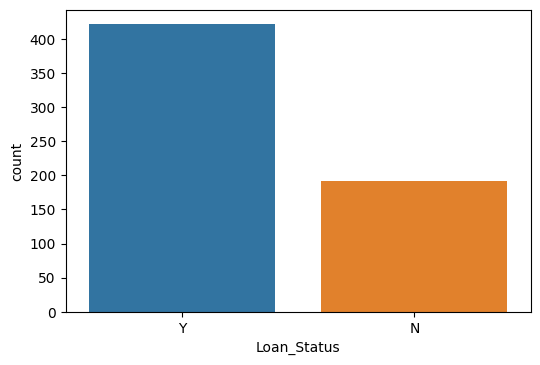

In [136]:
sns.countplot(x='Loan_Status', data=df)
#df['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:xlabel='Gender', ylabel='count'>

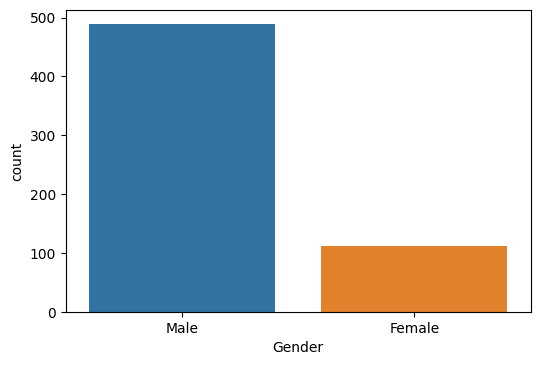

In [137]:
sns.countplot(x='Gender', data=df)
#df['Gender'].value_counts().plot.bar(title='Gender')

<AxesSubplot:xlabel='Married', ylabel='count'>

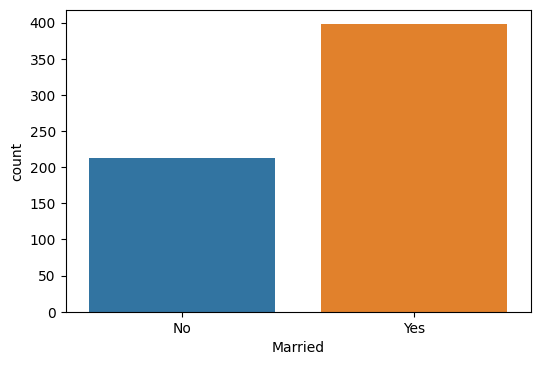

In [138]:
sns.countplot(x='Married', data=df)
#df['Married'].value_counts().plot.bar(title='Married')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

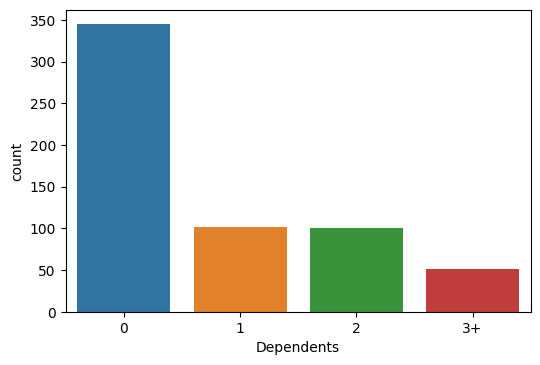

In [139]:
sns.countplot(x='Dependents', data=df)
#df['Dependents'].value_counts().plot.bar(title='Dependents')

<AxesSubplot:xlabel='Education', ylabel='count'>

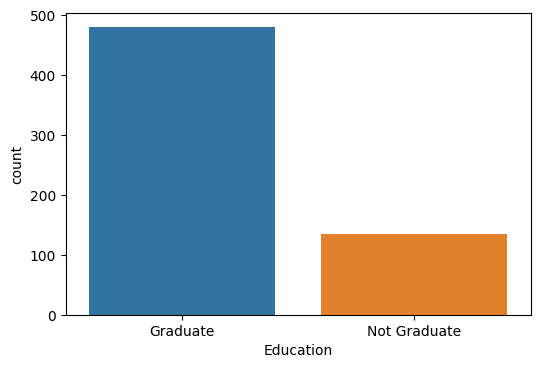

In [140]:
sns.countplot(x='Education', data=df)
#df['Education'].value_counts().plot.bar(title='Education')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

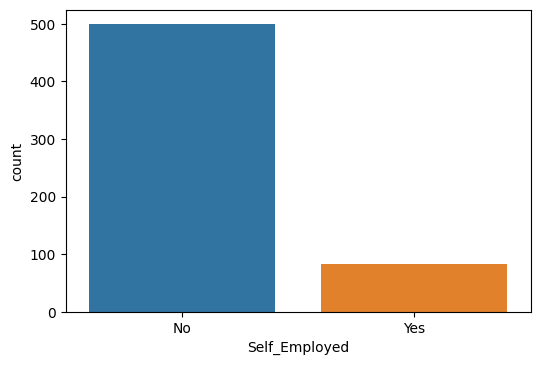

In [141]:
sns.countplot(x='Self_Employed', data=df)
#df['Self_Employed'].value_counts().plot.bar(title='Self_Employed')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

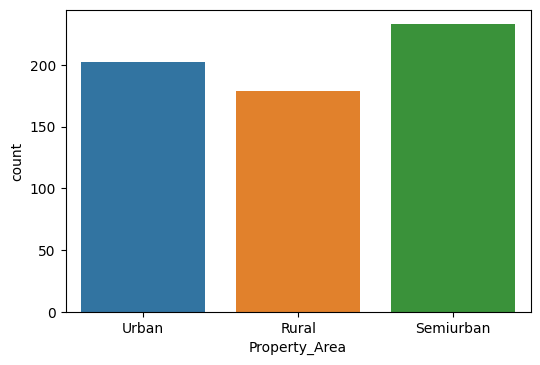

In [142]:
sns.countplot(x='Property_Area', data=df)
#df['Property_Area'].value_counts().plot.bar(title='Property_Area')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

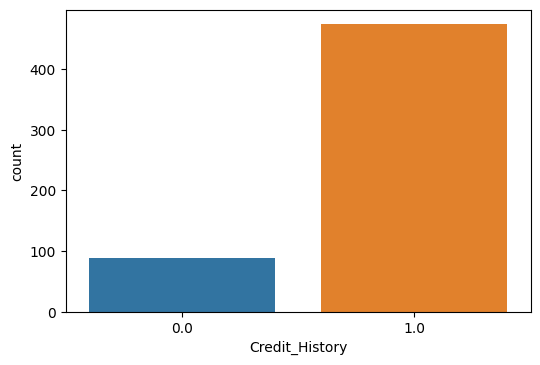

In [143]:
sns.countplot(x='Credit_History', data=df)
#df['Credit_History'].value_counts().plot.bar(title='Credit_History')

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

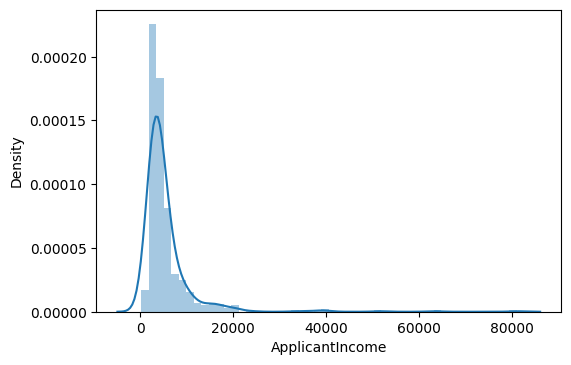

In [144]:
sns.distplot(df['ApplicantIncome'])
#plt.hist(df['ApplicantIncome'], bins=[0, 2000, 4000, 6000, 8000, 10000])

(array([  5.,  12.,  95., 129., 112.,  70.,  38.,  43.,  15.,  14.,  12.,
         13.,   9.,   6.,   4.,   3.,   2.,   3.,   4.,   3.,   4.,   2.,
          2.,   1.,   3.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  150. ,   958.5,  1767. ,  2575.5,  3384. ,  4192.5,  5001. ,
         5809.5,  6618. ,  7426.5,  8235. ,  9043.5,  9852. , 10660.5,
        11469. , 12277.5, 13086. , 13894.5, 14703. , 15511.5, 16320. ,
        17128.5, 17937. , 18745.5, 19554. , 20362.5, 21171. , 21979.5,
        22788. , 23596.5, 24405. ,

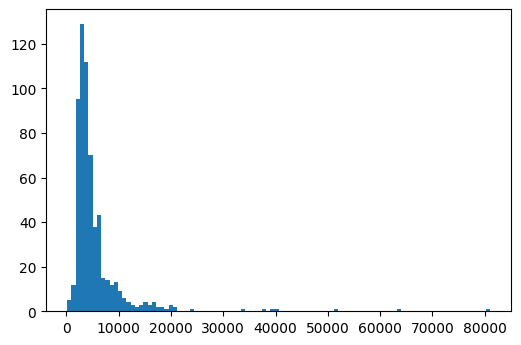

In [145]:
plt.hist(df['ApplicantIncome'], bins=100)


Look at box plots to understand the distributions. 

<AxesSubplot:>

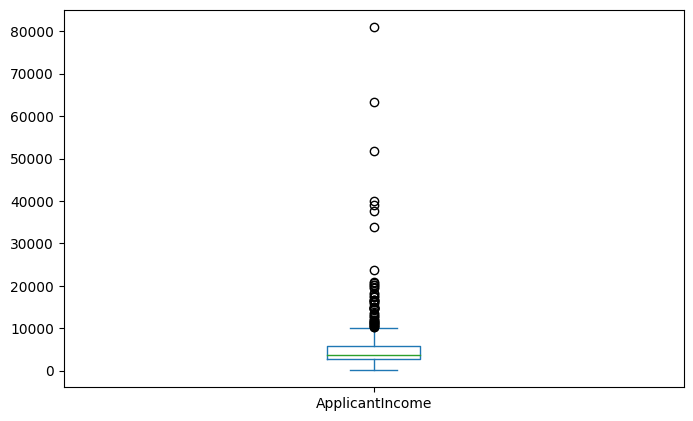

In [146]:
df['ApplicantIncome'].plot.box(figsize=(8,5))

Look at the distribution of income segregated  by `Education`

Text(0.5, 0.98, '')

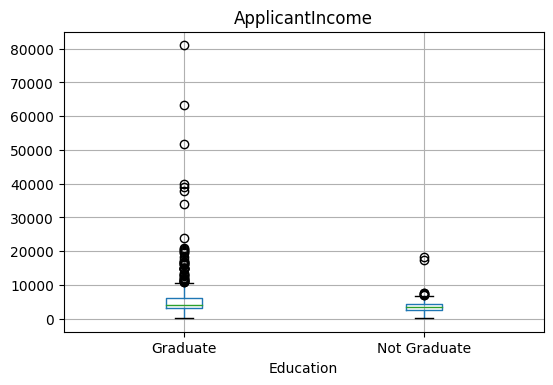

In [147]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

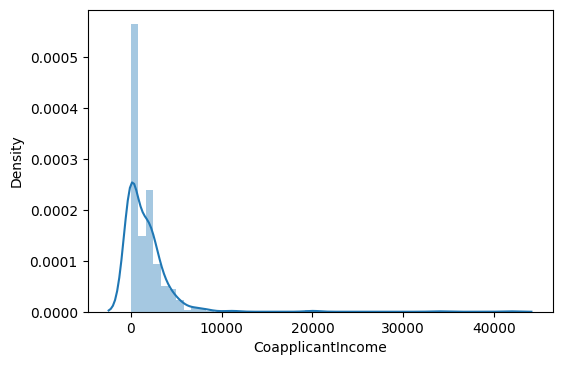

In [148]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:>

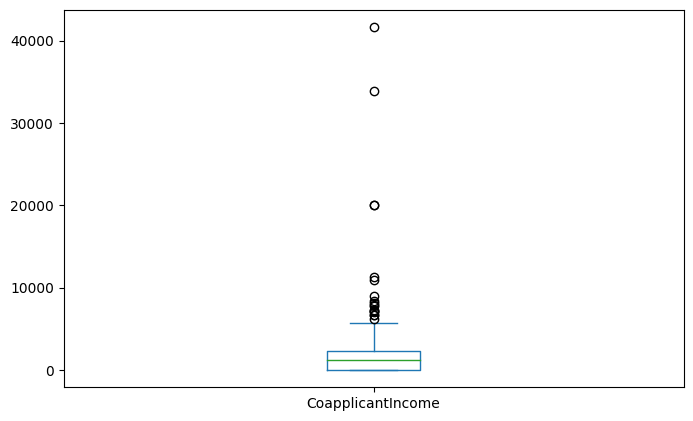

In [149]:
df['CoapplicantIncome'].plot.box(figsize=(8,5))

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

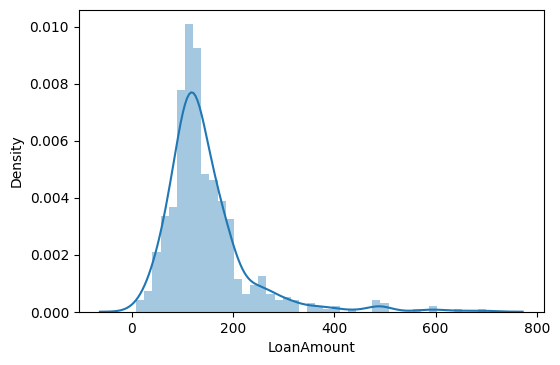

In [150]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:>

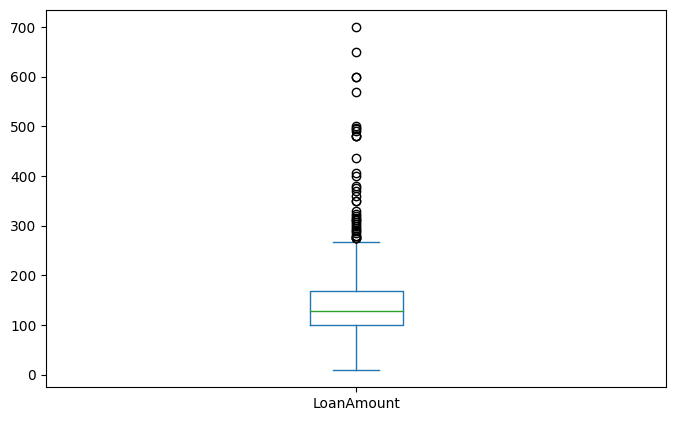

In [151]:
df['LoanAmount'].plot.box(figsize=(8,5))

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

#### Hypothesis (1): Applicants having a credit history

In [152]:
pd.pivot_table(df, values=['Loan_ID'], index=['Credit_History'], aggfunc='count')

,Loan_ID
Credit_History,
0.0,89
1.0,475


<AxesSubplot:xlabel='Credit_History'>

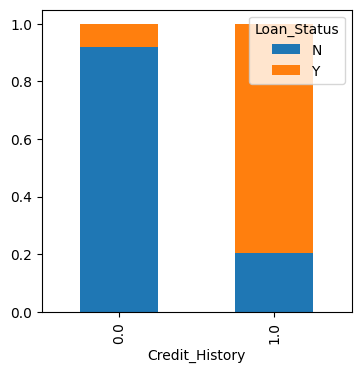

In [153]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#### Hypothesis (2): Applicants with higher applicant and co-applicant incomes


<AxesSubplot:xlabel='Loan_Status'>

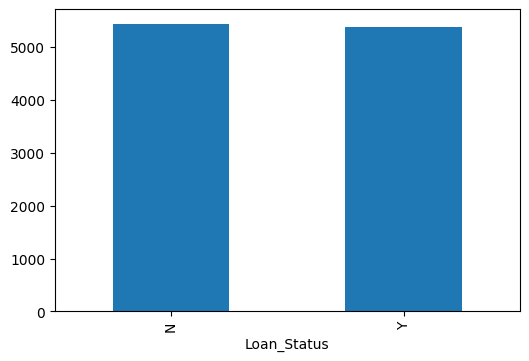

In [154]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

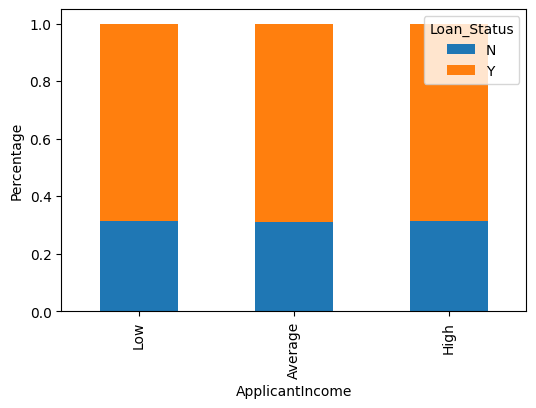

In [155]:
bins=[0,2500,8000, 81000]
group=['Low','Average','High']
df['Income_Bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_Bin=pd.crosstab(df['Income_Bin'],df['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')
df = df.drop('Income_Bin', axis=1)

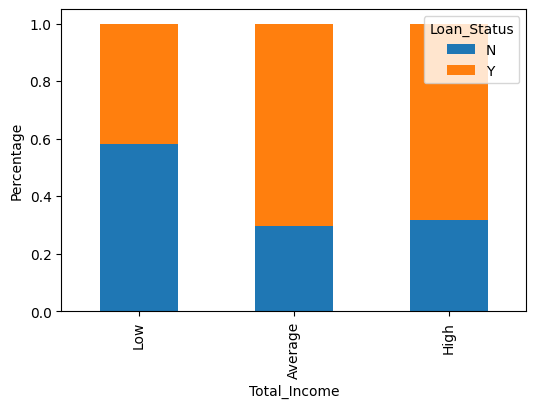

In [156]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
bins=[0,2500,8000, 81000]
group=['Low','Average','High']
df['Total_Income_Bin']=pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_Bin=pd.crosstab(df['Total_Income_Bin'],df['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')
df = df.drop(['Total_Income_Bin', 'Total_Income'], axis=1)

#### Hypothesis (3): Applicants with higher education level

In [157]:
pd.pivot_table(df, values=['Loan_ID'], index=['Education'], aggfunc='count')

,Loan_ID
Education,
Graduate,480
Not Graduate,134


<AxesSubplot:xlabel='Education'>

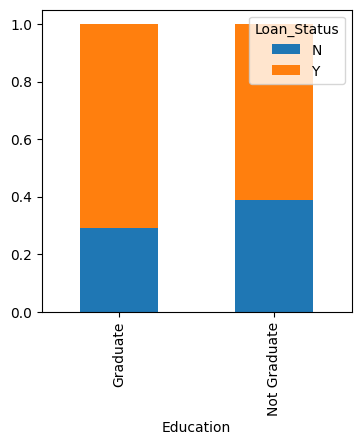

In [158]:
education=pd.crosstab(df['Education'],df['Loan_Status'])
education.div(education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#### Hypothesis (4): Properties in urban areas with high growth perspectives

In [159]:
pd.pivot_table(df, values=['Loan_ID'], index=['Loan_Status', 'Property_Area'], aggfunc='count')

Loan_ID
Loan_Status Property_Area         
N           Rural               69
            Semiurban           54
            Urban               69
Y           Rural              110
            Semiurban          179
            Urban              133

<AxesSubplot:xlabel='Property_Area'>

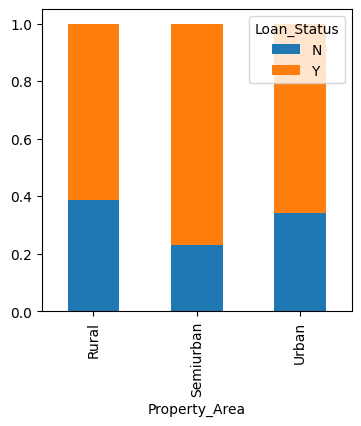

In [160]:
property_area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
property_area.div(property_area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

#### Check other categorial features also

<AxesSubplot:xlabel='Married'>

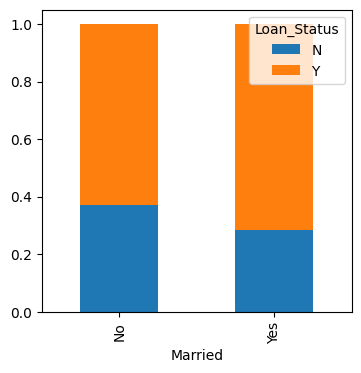

In [161]:
married=pd.crosstab(df['Married'],df['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

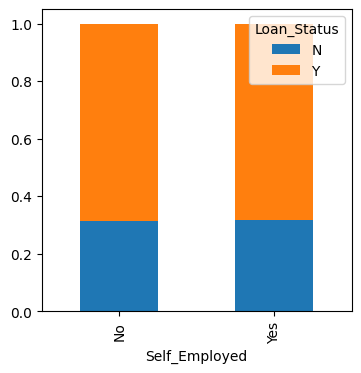

In [162]:
self_employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
self_employed.div(self_employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

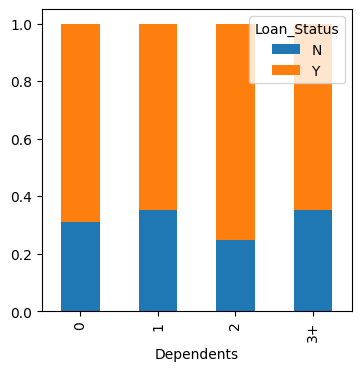

In [163]:
dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [164]:
# Gender: 13
# Married: 3
# Dependents: 15
# Self_Employed: 32
# LoanAmount: 22
# Loan_Amount_Term: 14
# Credit_History: 50

In [165]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:>

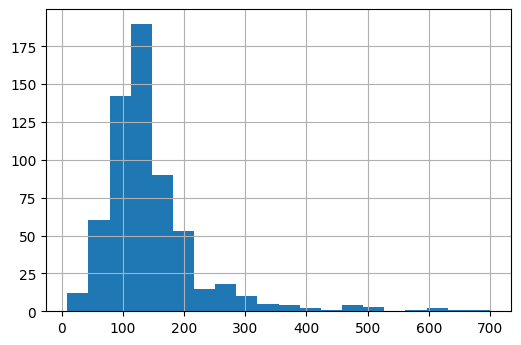

In [166]:
df['LoanAmount'].hist(bins=20)

In [167]:
df['LoanAmount_Log']=np.log(df['LoanAmount'])

<AxesSubplot:>

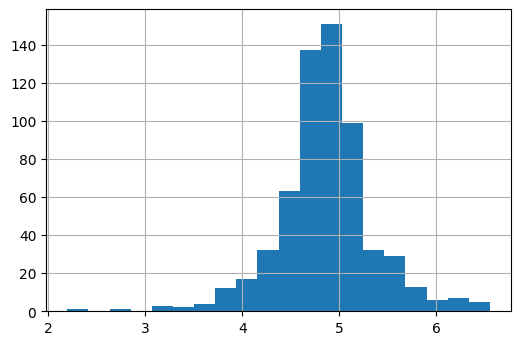

In [168]:
df['LoanAmount_Log'].hist(bins=20)

Combine both incomes as total income and take a log transformation of the same.

<AxesSubplot:>

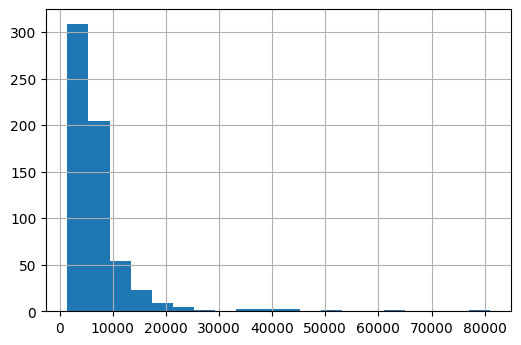

In [169]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Total_Income'].hist(bins=20)

In [170]:
df['Total_Income_Log']=np.log(df['Total_Income'])

<AxesSubplot:>

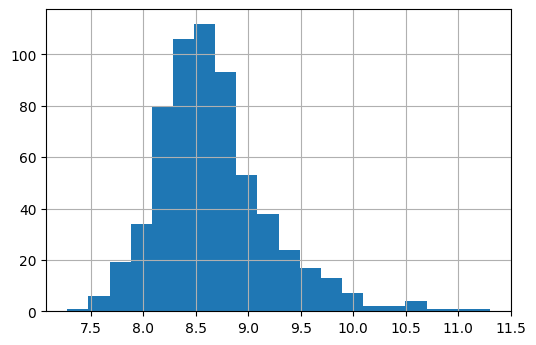

In [171]:
df['Total_Income_Log'].hist(bins=20)

In [172]:
df = df.drop(['Total_Income', 'LoanAmount_Log', 'Total_Income_Log'], axis=1)

## 4. Building a Predictive Model

In [65]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

y_train = y_train.map({'N':0, 'Y':1}).astype(int)
y_test = y_test.map({'N':0, 'Y':1}).astype(int)

cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
#num_feats = ['LoanAmount', 'Loan_Amount_Term', 'Total_Income']
num_feats = ['LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'EMI', 'Balance_Income']

#### start to prepare the data

In [66]:
# X_train = X_train.drop('Loan_ID', axis=1)
# X_test = X_test.drop('Loan_ID', axis=1)

X_train['Total_Income']=X_train['ApplicantIncome']+X_train['CoapplicantIncome']
X_test['Total_Income']=X_test['ApplicantIncome']+X_test['CoapplicantIncome']

X_train['EMI']=X_train['LoanAmount']/X_train['Loan_Amount_Term']
X_test['EMI']=X_test['LoanAmount']/X_test['Loan_Amount_Term']

X_train['Balance_Income']=X_train['Total_Income']-(X_train['EMI']*1000)
X_test['Balance_Income']=X_test['Total_Income']-(X_test['EMI']*1000)
#X_train['Balance_Income'] = X_train['Balance_Income'].apply(lambda x: 1 if x < 0 else x)

X_train['LoanAmount']=np.log(X_train['LoanAmount'])
X_test['LoanAmount']=np.log(X_test['LoanAmount'])

# X_train['Balance_Income']=np.log(X_train['Balance_Income'])
# X_test['Balance_Income']=np.log(X_test['Balance_Income'])

# X_train['EMI']=np.log(X_train['EMI'])
# X_test['EMI']=np.log(X_test['EMI'])

X_train['Total_Income']=np.log(X_train['Total_Income'])
X_test['Total_Income']=np.log(X_test['Total_Income'])

X_train = X_train.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
X_test = X_test.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [67]:
## seperate the dataset into numerical data and categorical data ###########
X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]


## process numerial features ###############################################
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)
X_train_num = pd.DataFrame(X_train_num, columns=num_feats)

X_test_num = scaler.fit_transform(X_test_num)
X_test_num = pd.DataFrame(X_test_num, columns=num_feats)


## process categorical features ############################################
encoder = OneHotEncoder(sparse=False)
X_train_cat = encoder.fit_transform(X_train_cat)
X_test_cat = encoder.fit_transform(X_test_cat)

X_train_cat = pd.DataFrame(X_train_cat)
X_test_cat = pd.DataFrame(X_test_cat)

## join numerical and categorical data into final set ######################
X_train = pd.concat([X_train_num, X_train_cat],axis=1)
X_test = pd.concat([X_test_num, X_test_cat],axis=1)

#### Build the model (LogisticRegression)

In [68]:
lgc = LogisticRegression(random_state=23)
lgc.fit(X_train, y_train)

y_pred = lgc.predict(X_test)
print('Logistic Regression accurancy score:', metrics.accuracy_score(y_test,y_pred))

Logistic Regression accurancy score: 0.7891891891891892


Try paramater grid search to improve the results

In [49]:
parameter_candidates = [
    {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
     'penalty': ['none', 'l1', 'l2', 'elasticnet'],
     'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
]

clf = GridSearchCV(estimator=lgc, param_grid=parameter_candidates)
clf.fit(X_train, y_train)   

print('Best solver:',clf.best_estimator_.solver) 
print('Best penalty:',clf.best_estimator_.penalty)
print('Best C:',clf.best_estimator_.C)
print('Score:', clf.score(X_test, y_test))

Best solver: liblinear
Best penalty: l1
Best C: 0.1
Score: 0.7891891891891892


#### Build the model (RandomForestClassifier)

In [50]:
rfc = RandomForestClassifier(random_state=23)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print('Random Forest accurancy score:', metrics.accuracy_score(y_test,y_pred))

Random Forest accurancy score: 0.772972972972973


Try paramater grid search to improve the results

In [ ]:
parameter_candidates = [
  {'n_estimators': [10, 50, 100, 200], 
   'max_depth': [5, 10, 20, 50, 100, None],
   'bootstrap': [True, False],
   'max_features': ['auto', 'sqrt'],
   'min_samples_leaf': [1, 2, 4],
   'min_samples_split': [2, 5, 10]
  }
]

clf = GridSearchCV(estimator=rfc, param_grid=parameter_candidates)
clf.fit(X_train, y_train)   

print('Best number of trees:',clf.best_estimator_.n_estimators) 
print('Best max depth:',clf.best_estimator_.max_depth)
print('Best bootstrap:',clf.best_estimator_.bootstrap)
print('Best max_features:',clf.best_estimator_.max_features)
print('Best min_samples_leaf:',clf.best_estimator_.min_samples_leaf)
print('Best min_samples_split:',clf.best_estimator_.min_samples_split)
print('Score:', clf.score(X_test, y_test))

#### Build the model (XGBClassifier)

In [52]:
xg_reg = xgb.XGBClassifier(min_child_weight=1, gamma=5, subsample=0.8, colsample_bytree=0.6, eval_metric='mlogloss', max_depth=3, random_state=23)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
print('XGBoost accurancy score:', metrics.accuracy_score(y_test,y_pred))

XGBoost accurancy score: 0.7621621621621621


Try paramater grid search to improve the results

In [ ]:
parameter_candidates = [
  {'min_child_weight': [1, 5, 10],
   'gamma': [0.5, 1, 1.5, 2, 5],
   'subsample': [0.6, 0.8, 1.0],
   'colsample_bytree': [0.6, 0.8, 1.0],
   'max_depth': [3, 4, 5]}
]

clf = GridSearchCV(estimator=xg_reg, param_grid=parameter_candidates)
clf.fit(X_train, y_train)   

print('Best min_child_weight:',clf.best_estimator_.min_child_weight) 
print('Best gamma:',clf.best_estimator_.gamma)
print('Best subsample:',clf.best_estimator_.subsample)
print('Best colsample_bytree:',clf.best_estimator_.colsample_bytree)
print('Best max_depth:',clf.best_estimator_.max_depth)
print('Score:', clf.score(X_test, y_test))

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [79]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

y_train = y_train.map({'N':0, 'Y':1}).astype(int)
y_test = y_test.map({'N':0, 'Y':1}).astype(int)

cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
num_feats = ['LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'EMI', 'Balance_Income']

In [80]:
# Using own function in Pipeline
def removeLoanID(data):
    if 'Loan_ID' in data:
        return data.drop('Loan_ID', axis=1)
    else:
        return data
def prepareTotalIncome(data):
    data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
    data = data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
    return data

def prepareEMI(data):
    data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']
    return data

def prepareBalanceIncome(data):
    data['Balance_Income']=data['Total_Income']-(data['EMI']*1000)
    return data

def logLoanAmount(data):
    data['LoanAmount']=np.log(data['LoanAmount'])
    return data

def logTotalIncome(data):
    data['Total_Income']=np.log(data['Total_Income'])
    return data


def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

class ToDenseTransformer():
    
    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

In [82]:
# Define categorical pipeline
cat_pipe = Pipeline([
    ('keep_cat', FunctionTransformer(catFeat)),
    ('encoder', OneHotEncoder())
    #('to_dense',ToDenseTransformer())
])

# Define numerical pipeline
num_pipe = Pipeline([
    ('keep_num', FunctionTransformer(numFeat)),
    ('scaler', StandardScaler())
])

# Fit feature union to training data
feature_union = FeatureUnion([
    ('cat', cat_pipe),
    ('num', num_pipe)
])

pipeline = Pipeline(steps=[('removeLoanID', FunctionTransformer(removeLoanID)),
                        ('prepareTotalIncome', FunctionTransformer(prepareTotalIncome)),
                        ('prepareEMI', FunctionTransformer(prepareEMI)),
                        ('prepareBalanceIncome', FunctionTransformer(prepareBalanceIncome)),
                        ('logLoanAmount', FunctionTransformer(logLoanAmount)),
                        ('logTotalIncome', FunctionTransformer(logTotalIncome)),
                        ('features', feature_union),
                        #('classifier', xgb.XGBClassifier(min_child_weight=1, gamma=5, subsample=0.8, colsample_bytree=0.6, eval_metric='mlogloss', max_depth=3, random_state=23))
                        #('classifier', LogisticRegression(random_state=23))
                        ('classifier', RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_split=10, n_estimators=10, random_state=23))
                       ])

pipeline.fit(X_train, y_train)
pipeline.score(X_test,y_test)

0.7837837837837838

In [ ]:
# importances=pd.Series(pipeline.steps[7][1].feature_importances_)
# importances.plot(kind='barh', figsize=(12,8))

In [ ]:
# set up our parameters grid
param_grid = [{'classifier': [LogisticRegression(random_state=23)],
              'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'classifier__penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'classifier__C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
              {'classifier': [RandomForestClassifier(random_state=23)],
              'classifier__n_estimators': [10, 50, 100, 200],
              'classifier__max_depth': [5, 10, 20, 50, 100, None],
               'classifier__bootstrap': [True, False],
               'classifier__max_features': ['auto', 'sqrt'],
               'classifier__min_samples_leaf': [1, 2, 4],
               'classifier__min_samples_split': [2, 5, 10]},
              {'classifier': [xgb.XGBClassifier(eval_metric='mlogloss', random_state=23)],
              'classifier__min_child_weight': [1, 5, 10],
              'classifier__gamma': [0.5, 1, 1.5, 2, 5],
              'classifier__subsample': [0.6, 0.8, 1.0],
              'classifier__colsample_bytree': [0.6, 0.8, 1.0],
              'classifier__min_child_weight': [3, 4, 5]}
             ]
    
# create a Grid Search object
grid_search = GridSearchCV(pipeline, param_grid, refit=True)    

# fit the model and tune parameters
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
print(grid_search.score(X_test, y_test))

#### try to take one row of our dataset and predict the probability of being granted a loan.

In [73]:
print(pipeline.predict(df[df['Loan_ID']=='LP001002']))

[1]


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [83]:
# save the model to disk
filename = 'output/finalized_model.sav'
joblib.dump(pipeline, filename)

['finalized_model.sav']

In [84]:
# load the model from disk
loaded_pipeline = joblib.load(filename)
result = loaded_pipeline.score(X_test, y_test)

In [126]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [121]:
input_data = {
'Loan_ID': 'LP010001',
'Gender': 'Male',
'Married': 'Yes',
'Dependents': '2',
'Education': 'Graduate',
'Self_Employed': 'No',
'ApplicantIncome': 5738,
'CoapplicantIncome': 1384,
'LoanAmount': 150,
'Loan_Amount_Term': 360,
'Credit_History': 1,
'Property_Area': 'Urban'}

df_new = pd.DataFrame([input_data])

In [122]:
df_new['Loan_Status'] = loaded_pipeline.predict(df_new)

In [123]:
df_new['Loan_Status'] = df_new['Loan_Status'].map({0:'N', 1:'Y'})

In [124]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP010001,Male,Yes,2,Graduate,No,5738,1384,150,360,1,Urban,Y
